### 0. Goals of this project
##### - Build a model using Linear Regression (LR) that accurately predicts the median price of a house
##### - Learn to use different metrics to determine the accuracy of the model
##### - Write a risk sensitivity report that highlights how varying different features influences house prices
##### - Develop an interactive dashboard to highlight relevant information

1. Imports and Data Set Information

This step is a good way to start your project. You immediately have access to a lot of important information.

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for ML model


In [309]:
original_df = pd.read_csv('Housing.csv')
df = original_df.copy(deep=True)

In [310]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [312]:
#Note: None of the columns have a datatype listed as 'Object' , which means there are no columns with mixed datatypes. 

In [313]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


2. Checking for missing values

It's always a good idea to make sure the entries are usable and relevant by checking them.

In [314]:
original_count = len(df['price'])
df_copy_count = len(df.dropna(axis=0, inplace=False))
num_rows_dropped = original_count- df_copy_count
print(num_rows_dropped)

#No null values 

0


In [315]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3. Exploratory Data Analysis

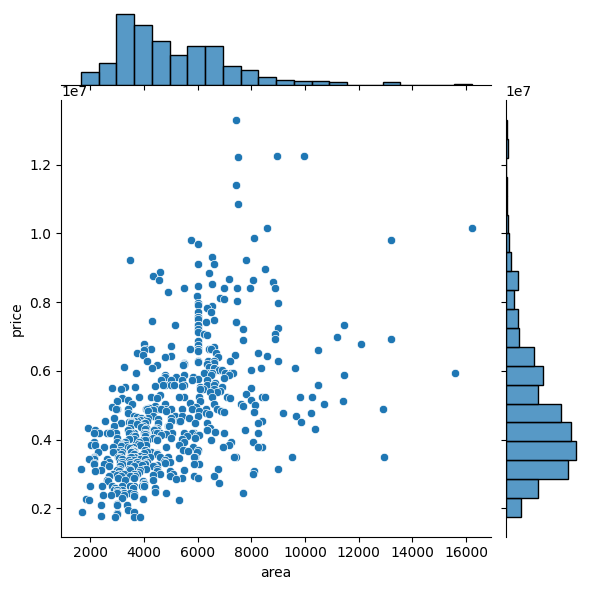

In [316]:
#Quick example
sns.jointplot(x= 'area', y ='price', data= df)

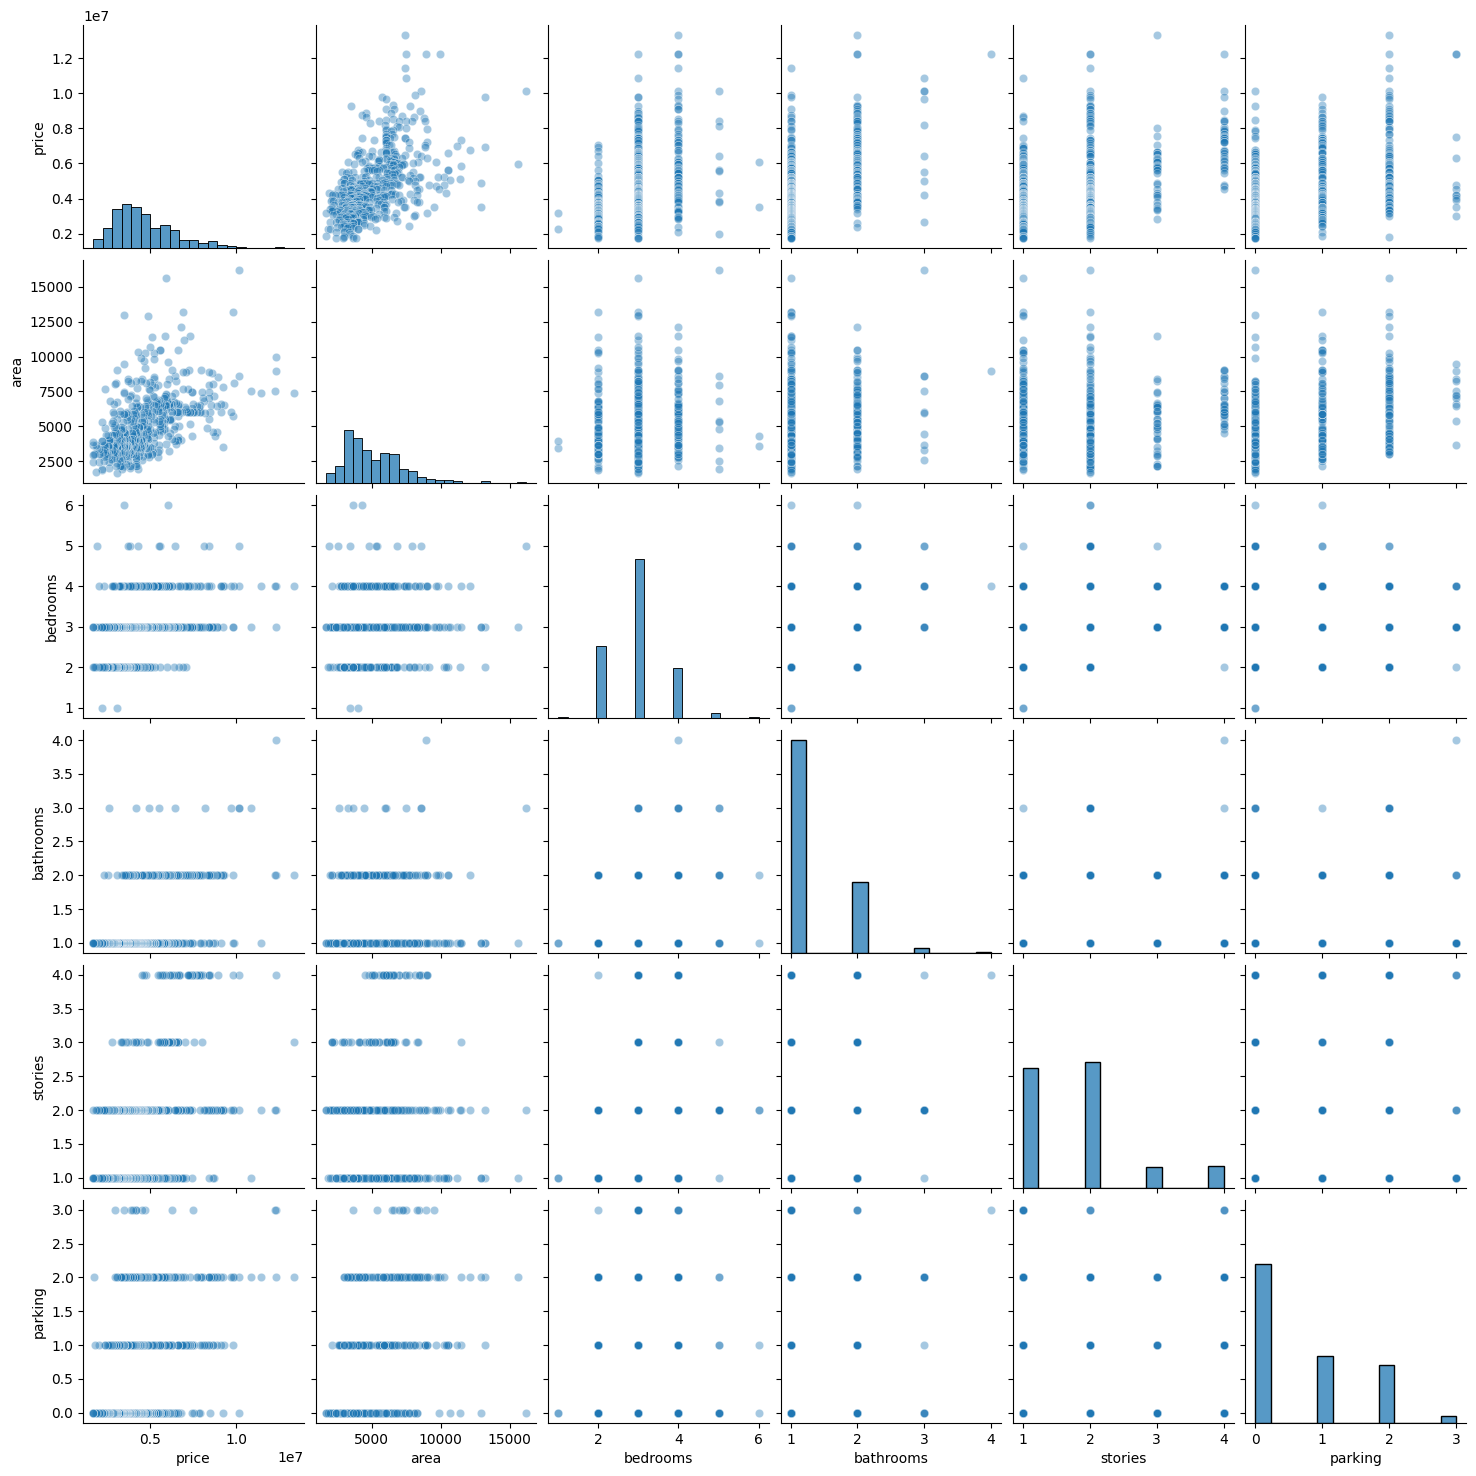

In [317]:
#Using pairplot because there are not that many columns with numerical entries
sns.pairplot(df, kind = 'scatter', plot_kws ={'alpha': 0.4} )

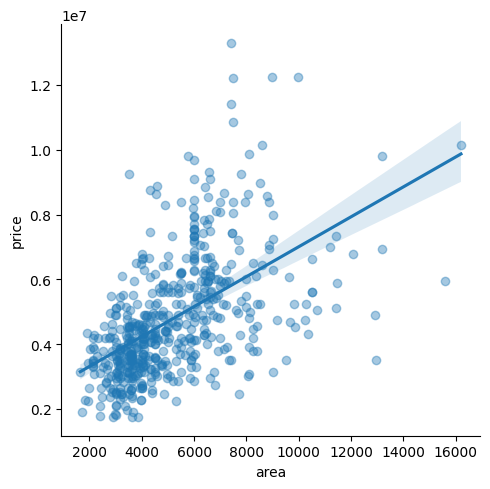

In [318]:
#Simple Linear Model plot
sns.lmplot(x = 'area',
           y = 'price',
           data = df,
           scatter_kws = {'alpha': 0.4})

3. Buildng the Linear Regression Model

In [319]:

#First, use a binary mapping for any binary categories (yes/no columns)
# and One-Hot Encoding for non-binary categories

yes_no_binary_mapping = {'no': 0, 'yes':1}
cols_for_binary_mapping = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']


In [320]:
#applying binary mapping
mapped_cols = df[cols_for_binary_mapping].map(lambda x: yes_no_binary_mapping[x]) #a new series
df = df.drop(cols_for_binary_mapping, axis=1)

In [321]:
df = pd.concat([df, mapped_cols], axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,semi-furnished,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,unfurnished,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,furnished,0,0,0,0,0,0


In [322]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 
ohetransform = ohe.fit_transform(df[['furnishingstatus']])

In [ ]:
df = pd.concat([df, ohetransform], axis=1)


In [324]:
df = df.drop('furnishingstatus', axis=1)

In [358]:
#Want a df with only influencing factors -> create a deep copy and drop the the target variable

predictors = df.drop('price', axis=1, inplace=False) #i.e. pricing factors
target = df.copy(deep = True)['price']


predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=42)


In [364]:
#training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression() #instance of our model
lm.fit(predictors_train, target_train)






,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [365]:
#basic cross val

from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(lm, predictors, target.values.ravel(), cv=10)

In [368]:

print(np.average(cvscore))
print(np.std(cvscore))

-44.03265707953339
35.233918693380126


In [360]:
cdf = pd.DataFrame(lm.coef_, predictors.columns, columns=['Coef'] )
cdf

,Coef
area,2.532873e+02
bedrooms,8.089314e+04
bathrooms,1.114751e+06
stories,4.172676e+05
parking,3.031112e+05
mainroad,4.080737e+05
guestroom,2.757105e+05
basement,4.826035e+05
hotwaterheating,6.163754e+05
airconditioning,6.858393e+05


In [361]:
#predictions
predictions_test = lm.predict(predictors_test)
predictions_train = lm.predict(predictors_train) #for evaluating later on

Text(0.5, 1.0, 'Evaluation of our LN Model')

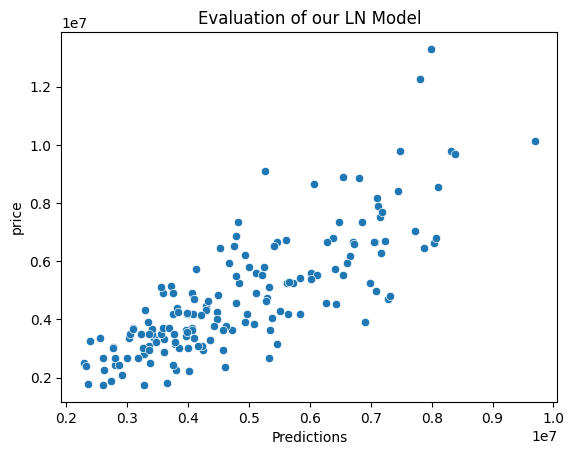

In [362]:
sns.scatterplot(x= predictions_test, y= target_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LN Model')

In [363]:
#Evaluating the model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
train_MAE = mean_absolute_error(target_train, predictions_train)
train_RMSE = math.sqrt(mean_squared_error(target_train, predictions_train))
test_MAE = mean_absolute_error(target_test, predictions_test)
test_RMSE =  math.sqrt(mean_squared_error(target_test, predictions_test))
diff_RMSE = abs(train_RMSE - test_RMSE)

print('Train Mean Absolute Error: ', train_MAE)
print("Train Root Mean Squared Error: ", train_RMSE)
print("Test Mean Absolute Error: ", test_MAE)
print("Test Root Mean Squared Error: ", test_RMSE)

print("The difference between the train RMSE and test RMSE is", diff_RMSE )


Train Mean Absolute Error:  720245.1987194599
Train Root Mean Squared Error:  981751.1802021731
Test Mean Absolute Error:  920392.9397607958
Test Root Mean Squared Error:  1234106.749637685
The difference between the train RMSE and test RMSE is 252355.56943551195
